# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing dataframes

In [8]:
# Defining the path
path = r'C:\Users\Admin\2nd-OCT-2023 Instacart Basket Analysis'

In [9]:
path

'C:\\Users\\Admin\\2nd-OCT-2023 Instacart Basket Analysis'

In [11]:
ords_prods_customer_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge_.pkl'))

In [12]:
ords_prods_customer_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_orde,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# Q3. Create a histogram of the “order_hour_of_day” column.

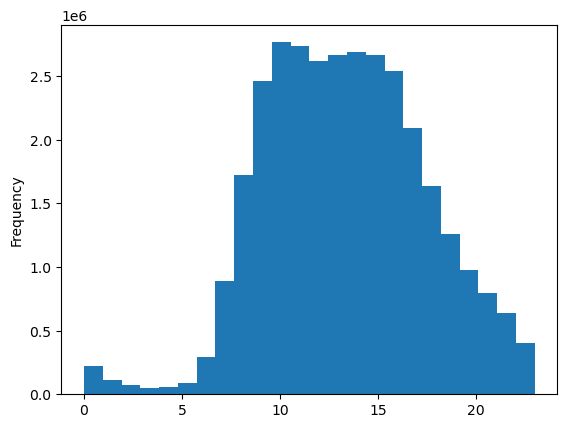

In [13]:
hist_orders_hour_of_day = ords_prods_customer_merge['order_hour_of_day'].plot.hist(bins = 24)

For the histogram above, we can conclude that peak hours for orders are approximately 9AM to 4PM. Orders see a steady decline after 4PM and bottom out between 1AM and 5AM.

In [15]:
#exporting histogram
hist_orders_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

# Q4. Create a bar chart from the “loyalty_flag” column.

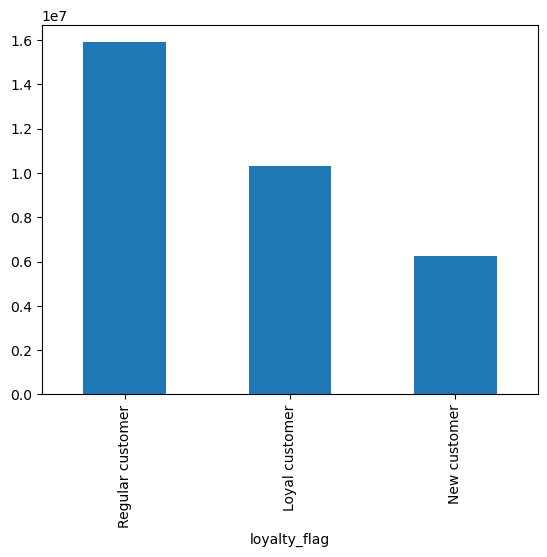

In [16]:
bar_loyalty_flag = ords_prods_customer_merge['loyalty_flag'].value_counts().plot.bar()

In [17]:
# Export bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

# Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [19]:
# Create a sample from a list of random floating numbers 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_customer_merge)) <= 0.7

In [20]:
dev

array([False,  True, False, ..., False,  True,  True])

In [21]:
# Split the merged dataframe into big and small
big = ords_prods_customer_merge[dev]
small = ords_prods_customer_merge[~dev]

In [22]:
# Check the count of the whole dataframe
len(ords_prods_customer_merge)

32434212

In [23]:
# Check that the big and small data set count match with the entire dataframe count 
len(big)+len (small)

32434212

In [24]:
#making the small dataframe only contain 2 columns and renaming df_2
df_2 = small[['order_hour_of_day','prices']]

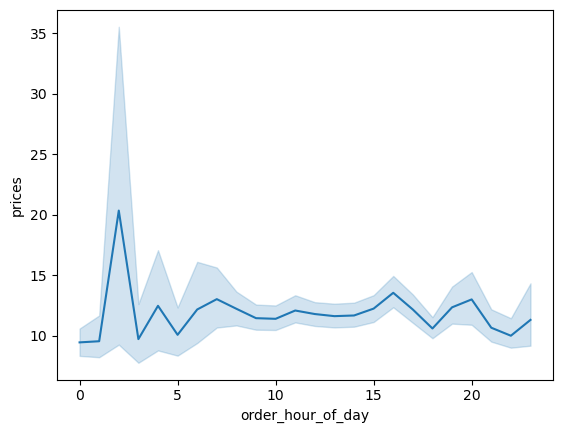

In [25]:
# Create the line graph
line_hour_price = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

In [26]:
# Export line_hour_price chart
line_hour_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_price.png'))

# Q6. Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

In [28]:
df_3 = small[['age', 'number_of_dependants']]

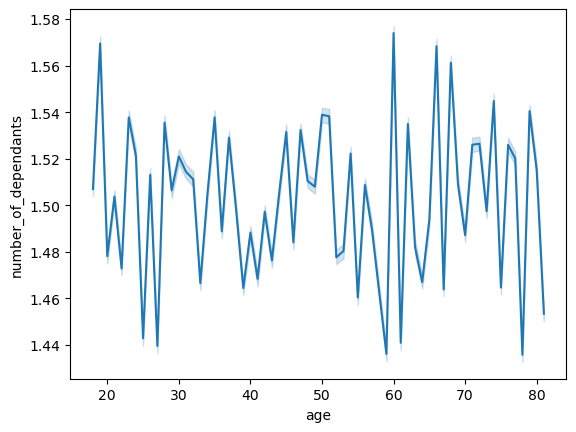

In [29]:
line_age_number_of_dependents = sns.lineplot(data = ords_prods_customer_merge, x = 'age', y = 'number_of_dependants')

There doesn't seem to be any apparent correlation between age and number of dependants.

In [30]:
# Export line_age_number_of_dependants
line_age_number_of_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_number_of_dependants.png'))

# Q7. Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

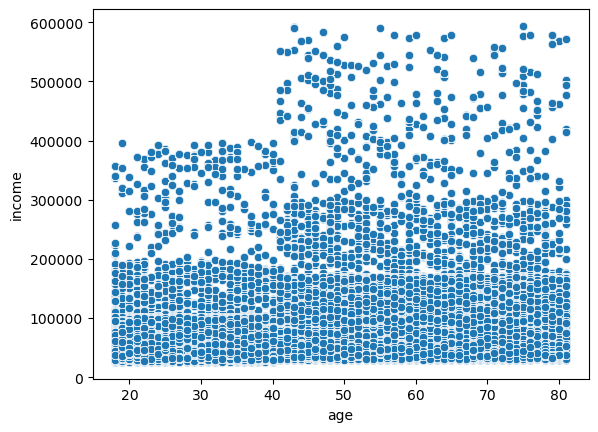

In [31]:
# Create a scatterplot of age and income
scatter_age_income = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_customer_merge)

The scatterplot shows that even though the majority seem to earn within 200,000, there is a jump in the income of individuals aged above 40. There are more people aged 40+ that earn above 200,000 with some individuals able to earn an income above 400,000. No one below 40 managed to earn above 400,000. As such we can determine that there is a slightly positive correlation between age and income.

In [32]:
# Export scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))